<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-and-familiarizing-with-the-data" data-toc-modified-id="Reading-and-familiarizing-with-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading and familiarizing with the data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Region" data-toc-modified-id="Region-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Region</a></span></li><li><span><a href="#Type" data-toc-modified-id="Type-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Type</a></span></li><li><span><a href="#Year" data-toc-modified-id="Year-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Year</a></span></li><li><span><a href="#Date" data-toc-modified-id="Date-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Other-features" data-toc-modified-id="Other-features-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Other features</a></span></li></ul></li><li><span><a href="#Creating-models." data-toc-modified-id="Creating-models.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating models.</a></span></li><li><span><a href="#Fitting-and-Model-Evaluation" data-toc-modified-id="Fitting-and-Model-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting and Model Evaluation</a></span></li><li><span><a href="#Conclusions." data-toc-modified-id="Conclusions.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions.</a></span></li></ul></div>

# Avocado price prediction

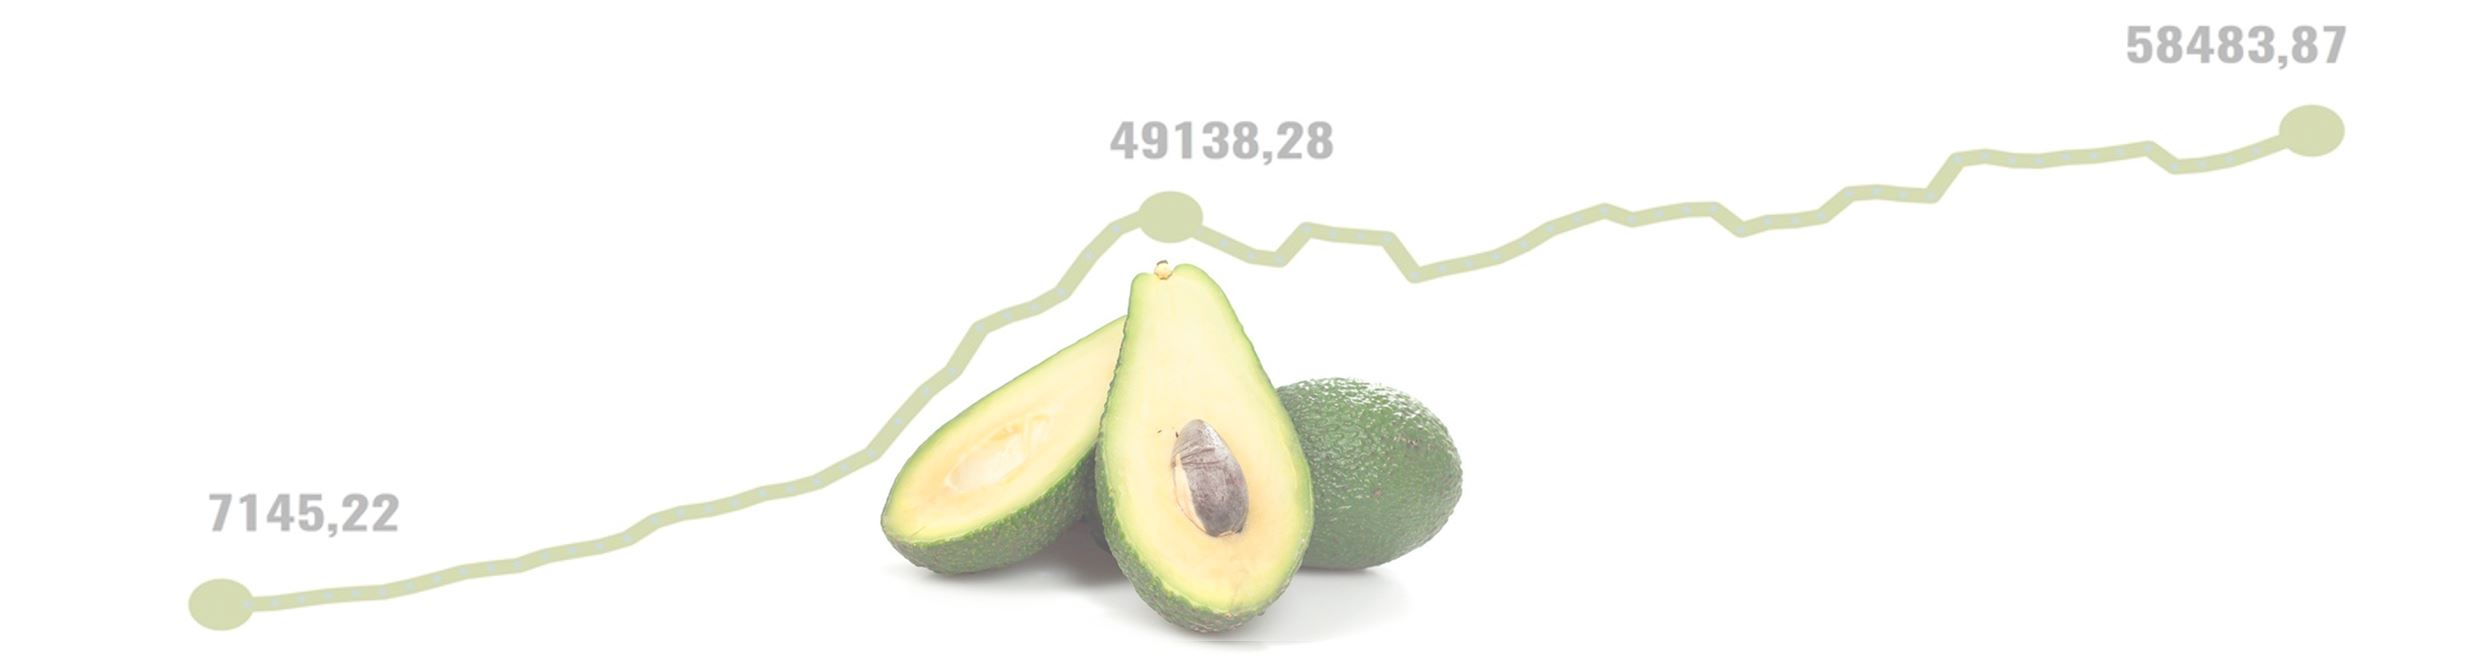

In [391]:
from IPython.display import Image
Image(filename='avocado_price.jpg')

In [392]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp

## Reading and familiarizing with the data

In [393]:
df = pd.read_csv('FinalHW.csv')
df.head(3)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [394]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
TotalVolume     1
4046            1
4225            0
4770            0
TotalBags       1
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

In [395]:
df.describe()

,Unnamed: 0,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,18249.000000,18249.000000,1.824800e+04,1.824800e+04,1.824900e+04,1.824900e+04,1.824800e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506696e+05,2.930245e+05,2.951546e+05,2.283974e+04,2.396498e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453638e+06,1.265022e+06,1.204120e+06,1.074641e+05,9.862684e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083788e+04,8.544900e+02,3.008780e+03,0.000000e+00,5.087330e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073655e+05,8.646205e+03,2.906102e+04,1.849900e+02,3.974118e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.330098e+05,1.110289e+05,1.502069e+05,6.243420e+03,1.107849e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [396]:
#pp.ProfileReport(df)

## Preprocessing

### Region

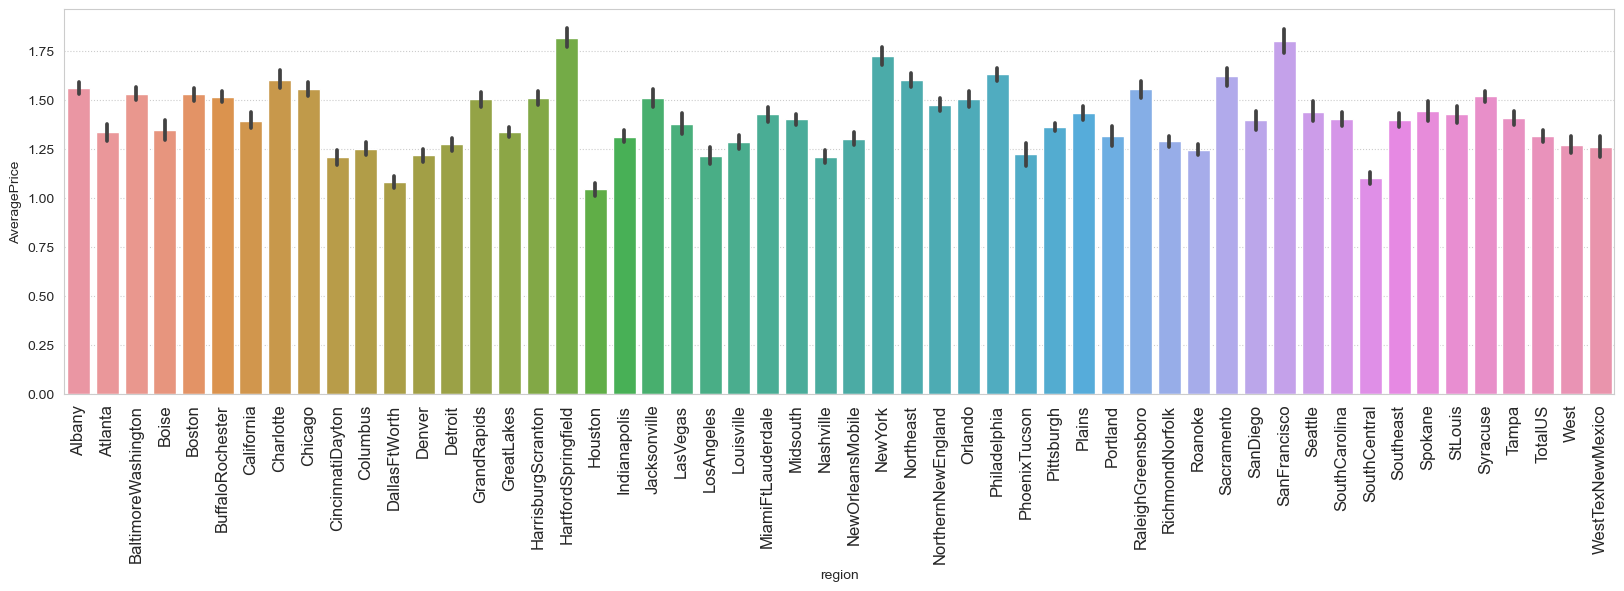

In [397]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'AveragePrice', data = df)
plt.xticks(fontsize = 12, rotation = 90)
plt.show()

In [398]:
unique = np.unique(df['region'].to_numpy().ravel().tolist())
df1 = pd.DataFrame((unique), columns=['region'])
df1

,region
0,Albany
1,Atlanta
2,BaltimoreWashington
3,Boise
4,Boston
5,BuffaloRochester
6,California
7,Charlotte
8,Chicago
9,CincinnatiDayton


In [399]:
df_0 = df1.copy()

In [400]:
df1.iloc[2,0] = 'Baltimore Washington'
df1.iloc[5,0] = 'Buffalo Rochester'
df1.iloc[9,0] = 'Cincinnati Dayton'
df1.iloc[11,0] = 'Dallas Ft Worth'
df1.iloc[14:18,0] = 'Grand Rapids', 'Great Lakes', 'Harrisburg', 'Hartford Springfield'
df1.iloc[24,0] = 'Miami Ft Lauderdale'
df1.iloc[27,0] = 'New Orleans Mobile'
df1.iloc[30,0] = 'Northern New England'
df1.iloc[33,0] = 'Phoenix Tucson'
df1.iloc[37:39,0] = 'Raleigh Greensboro', 'Richmond Norfolk'
df1.iloc[44,0] = 'South Carolina'
df1.iloc[51,0] = 'Total US'
df1.iloc[53,0] = 'West Texas'

In [401]:
df_1 = df1.copy()
df_1.columns = ['fix_region']
df_1 = pd.concat([df_0, df_1], axis=1)
df_1.head(3)

,region,fix_region
0,Albany,Albany
1,Atlanta,Atlanta
2,BaltimoreWashington,Baltimore Washington


In [402]:
from collections import defaultdict
dict_1 = defaultdict(list)
for idx,row in df_1.iterrows():
    dict_1[row['region']].append(row['fix_region'])

In [403]:
df['fix_region'] = df['region'].map(dict_1)

In [404]:
df['fix_region'] = df['fix_region'].str[0]

In [405]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,fix_region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Albany


In [406]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='geoapiExercises')

In [407]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
longitude = []
latitude = []
   
def findGeocode(city):
    try:
        geolocator = Nominatim(user_agent="none")
        return geolocator.geocode(city)
    except GeocoderTimedOut:
        return findGeocode(city)
    
for i in (df1['region']):
    if findGeocode(i) != None:
        loc = findGeocode(i)

        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [408]:
df1["Latitude"] = latitude
df1["Longitude"] = longitude

In [409]:
df1.head(3)

,region,Latitude,Longitude
0,Albany,41.000028,19.999962
1,Atlanta,33.748992,-84.390264
2,Baltimore Washington,39.236103,-76.632726


In [410]:
df1.to_csv('geo_coord.csv', index=False)

In [411]:
df1 = pd.read_csv('geo_coord.csv')

In [412]:
df2 = df1.drop('region', axis=1) 

In [413]:
def city_state_country(row):
    coord = f"{row['Latitude']}, {row['Longitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    #city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    #row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

df2 = df2.apply(city_state_country, axis=1)
print(df2)

     Latitude   Longitude                         state         country
0   41.000028   19.999962            Shqipëria Qendrore       Shqipëria
1   33.748992  -84.390264                       Georgia   United States
2   39.236103  -76.632726                      Maryland   United States
3   43.616616 -116.200886                         Idaho   United States
4   42.355433  -71.060511                 Massachusetts   United States
5   43.154334  -77.616963                      New York   United States
6   36.701463 -118.755997                    California   United States
7   35.227209  -80.843083                North Carolina   United States
8   41.875562  -87.624421                      Illinois   United States
9   39.118393  -84.529110                          Ohio   United States
10  39.962260  -83.000707                          Ohio   United States
11  32.896519  -97.046522                         Texas   United States
12  39.739236 -104.984862                      Colorado   United

In [414]:
df3 = pd.DataFrame(df2)
df3.iloc[28,3] = 'Japan'
df3 = pd.concat([df_1['fix_region'], df3], axis=1)

In [415]:
df3.head(3)

,fix_region,Latitude,Longitude,state,country
0,Albany,41.000028,19.999962,Shqipëria Qendrore,Shqipëria
1,Atlanta,33.748992,-84.390264,Georgia,United States
2,Baltimore Washington,39.236103,-76.632726,Maryland,United States


In [416]:

dict_2 = defaultdict(list)
for idx,row in df3.iterrows():
    dict_2[row['fix_region']].append(row['country'])

In [417]:
df['Country'] = df['fix_region'].map(dict_2)

In [418]:
df['Country'] = df['Country'].str[0]

In [419]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,fix_region,Country
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Albany,Shqipëria
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Albany,Shqipëria
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Albany,Shqipëria


In [420]:
df4 = df.copy()
df4 = df4.drop(['region', 'fix_region'], axis=1)
df4.head(3)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,Country
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Shqipëria
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Shqipëria
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Shqipëria


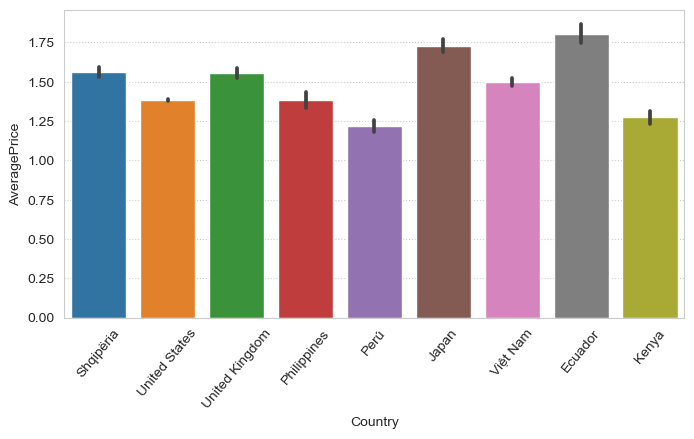

In [421]:
plt.figure(figsize=(8,4))
sns.barplot(x = 'Country', y = 'AveragePrice', data = df4)
plt.xticks(fontsize = 10, rotation = 50)
plt.show()

In [422]:
country_dummies = pd.get_dummies(df4['Country'], drop_first = True)
country_dummies.head(1)

,Japan,Kenya,Perú,Philippines,Shqipëria,United Kingdom,United States,Việt Nam
0,0,0,0,0,1,0,0,0


In [423]:
country_dummies.columns.values

array(['Japan', 'Kenya', 'Perú', 'Philippines', 'Shqipëria',
       'United Kingdom', 'United States', 'Việt Nam'], dtype=object)

In [424]:
rename = ['Japan', 'Kenya', 'Peru', 'Philippines', 'Albania',
       'United Kingdom', 'United States', 'Vietnam']
country_dummies.columns = rename

In [425]:
df5 = pd.concat([df4, country_dummies], axis=1)

In [426]:
df5 = df5.drop(['Country'], axis=1)

In [427]:
df5.head(1)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,...,type,year,Japan,Kenya,Peru,Philippines,Albania,United Kingdom,United States,Vietnam
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,conventional,2015,0,0,0,0,1,0,0,0


### Type

In [428]:
df6 = df5.copy()

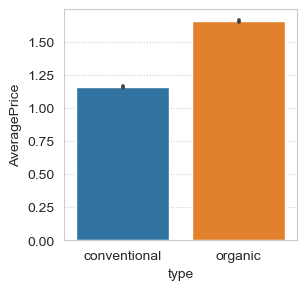

In [429]:
plt.figure(figsize=(3,3))
sns.barplot(x = 'type', y = 'AveragePrice', data = df6)
plt.show()

In [430]:
type_dummies = pd.get_dummies(df6['type'], drop_first = True)
type_dummies.head(1)

,organic
0,0


In [431]:
df6 = pd.concat([df6, type_dummies], axis=1)
df6 = df6.drop(['type'], axis=1)

In [432]:
df6.head(1)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,...,year,Japan,Kenya,Peru,Philippines,Albania,United Kingdom,United States,Vietnam,organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,2015,0,0,0,0,1,0,0,0,0


### Year

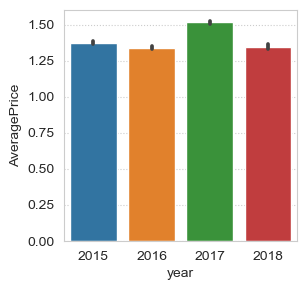

In [433]:
plt.figure(figsize=(3,3))
sns.barplot(x = 'year', y = 'AveragePrice', data = df6)
plt.show()

In [434]:
year_dummies = pd.get_dummies(df6['year'], drop_first = True)
year_dummies.head(1)

,2016,2017,2018
0,0,0,0


In [435]:
df6 = pd.concat([df6, year_dummies], axis=1)
df6 = df6.drop(['year'], axis=1)

In [436]:
df6.head(1)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,...,Peru,Philippines,Albania,United Kingdom,United States,Vietnam,organic,2016,2017,2018
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,0,0,1,0,0,0,0,0,0,0


### Date

In [437]:
df7 = df6.copy()

In [438]:
df7['month'] = pd.to_datetime(df7['Date'])

In [439]:
df7['only_month'] = df7['month'].dt.month

In [440]:
df7['Seasons'] = 0
for i in df7.index:
    if df7['only_month'][i] >=3 and df7['only_month'][i] <=5:
        df7.loc[i, 'Seasons'] = 'Spring'
    if df7['only_month'][i] >=6 and df7['only_month'][i] <=8:
        df7.loc[i, 'Seasons'] = 'Summer'
    if df7['only_month'][i] >=9 and df7['only_month'][i] <=11:
        df7.loc[i, 'Seasons'] = 'Autumn'
    if df7['only_month'][i] >=1 and df7['only_month'][i] <=2:
        df7.loc[i, 'Seasons'] = 'Winter'
    if df7['only_month'][i] == 12:
        df7.loc[i, 'Seasons'] = 'Winter'

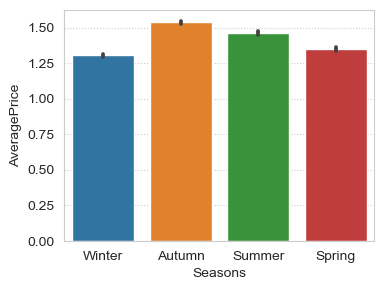

In [441]:
plt.figure(figsize=(4,3))
sns.barplot(x = 'Seasons', y = 'AveragePrice', data = df7)
plt.show()

In [442]:
seasons_dummies = pd.get_dummies(df7['Seasons'], drop_first = True)
seasons_dummies.head(1)

,Spring,Summer,Winter
0,0,0,1


In [443]:
df7 = pd.concat([df7, seasons_dummies], axis=1)

In [444]:
df7.head(1)

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,...,organic,2016,2017,2018,month,only_month,Seasons,Spring,Summer,Winter
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,0,0,0,0,2015-12-27,12,Winter,0,0,1


In [445]:
df7 = df7.drop(['Date', 'month', 'only_month', 'Seasons'], axis=1)
df7.head(1)

,Unnamed: 0,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,...,United Kingdom,United States,Vietnam,organic,2016,2017,2018,Spring,Summer,Winter
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,1


### Other features

In [461]:
df8 = df7.copy()

In [462]:
df8 = df8.rename(columns={'4046':'Small', '4225':'Large', '4770':'Extra Large', 2016:'2016',
       2017:'2017', 2018:'2018'})
df8.columns.values

array(['Unnamed: 0', 'AveragePrice', 'TotalVolume', 'Small', 'Large',
       'Extra Large', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags',
       'Japan', 'Kenya', 'Peru', 'Philippines', 'Albania',
       'United Kingdom', 'United States', 'Vietnam', 'organic', '2016',
       '2017', '2018', 'Spring', 'Summer', 'Winter'], dtype=object)

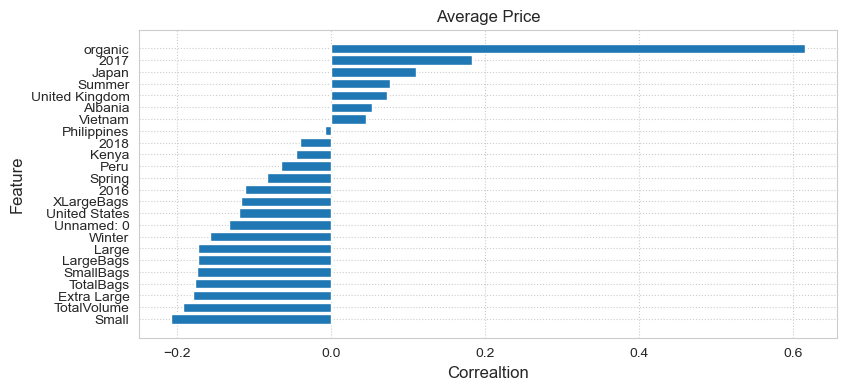

In [463]:
plt.figure(figsize=(9,4))
cor = df8.corr()['AveragePrice'].sort_values(ascending = True)
plt.barh(cor.index[:-1], cor[:-1])
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.xlabel('Correaltion', fontsize = 12)
plt.ylabel('Feature', fontsize = 12)
plt.title (label='Average Price', fontsize = 12)
plt.show()

In [464]:
df8.loc[:, ['TotalVolume','Small', 'TotalBags']].isnull().sum()

TotalVolume    1
Small          1
TotalBags      1
dtype: int64

In [465]:
df8 = df8.fillna(df8.mean())

In [466]:
#df8['TotalVolume'] = df8['TotalVolume'].fillna('0').astype(int)
#df8['4046'] = df8['4046'].fillna('0').astype(int)
#df8['TotalBags'] = df8['TotalBags'].fillna('0').astype(int)
df8.loc[:, ['TotalVolume','Small', 'TotalBags']].isnull().sum()

TotalVolume    0
Small          0
TotalBags      0
dtype: int64

In [467]:
df8.describe()

,Unnamed: 0,AveragePrice,TotalVolume,Small,Large,Extra Large,TotalBags,SmallBags,LargeBags,XLargeBags,...,United Kingdom,United States,Vietnam,organic,2016,2017,2018,Spring,Summer,Winter
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,...,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506696e+05,2.930245e+05,2.951546e+05,2.283974e+04,2.396498e+05,1.821947e+05,5.433809e+04,3106.426507,...,0.037043,0.814784,0.037043,0.499918,0.307743,0.313551,0.071018,0.260398,0.230698,0.278097
std,15.481045,0.402677,3.453544e+06,1.264987e+06,1.204120e+06,1.074641e+05,9.862414e+05,7.461785e+05,2.439660e+05,17692.894652,...,0.188873,0.388483,0.188873,0.500014,0.461572,0.463949,0.256861,0.438864,0.421291,0.448074
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.100000,1.083858e+04,8.546300e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,1.370000,1.073768e+05,8.647110e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,1.660000,4.331523e+05,1.110548e+05,1.502069e+05,6.243420e+03,1.107893e+05,8.333767e+04,2.202925e+04,132.500000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating models.

In [472]:
df_final = df8.copy()

In [473]:
y = df_final['AveragePrice']
df_final.drop(columns=['AveragePrice'], axis=1, inplace=True)
df_final.head(1)

,Unnamed: 0,TotalVolume,Small,Large,Extra Large,TotalBags,SmallBags,LargeBags,XLargeBags,Japan,...,United Kingdom,United States,Vietnam,organic,2016,2017,2018,Spring,Summer,Winter
0,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [474]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_final,y,test_size=0.2,random_state=2)

In [475]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [476]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


LR = LinearRegression()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
RFR = RandomForestRegressor(n_estimators=100)
KNR = KNeighborsRegressor()
SVR = SVR()

## Fitting and Model Evaluation

In [478]:
models = [LR,
         DTR,
         GBR,
         RFR,
         KNR,
         SVR
         ]
MAE = []
MSE = []
R2 = []
model = []

for m in models:
    m.fit(X_train,y_train)
    prediction = m.predict(X_test)
    
    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    r2 = r2_score(y_test,prediction)
        
    print('Model:\033[07m {} \033[0m'.format(m))
    print('Test MAE :\033[32m \033[01m{:.2f}% \033[30m \033[0m'.format(mae * 100))
    print('Test MSE :\033[32m \033[01m{:.2f}% \033[30m \033[0m'.format(mse * 100))
    print('Test R2 :\033[32m \033[01m{:.2f}% \033[30m \033[0m'.format(r2 * 100))
    
    MAE += [mae * 100]
    MSE += [mse * 100]
    R2 += [r2 * 100]
    model += [m]
    
    print('''________________________________________
    
    ''')

Model: LinearRegression() 
Test MAE : 21.62%  
Test MSE : 7.83%  
Test R2 : 50.71%  
________________________________________
    
    
Model: DecisionTreeRegressor() 
Test MAE : 12.50%  
Test MSE : 3.84%  
Test R2 : 75.80%  
________________________________________
    
    
Model: GradientBoostingRegressor() 
Test MAE : 15.73%  
Test MSE : 4.25%  
Test R2 : 73.23%  
________________________________________
    
    
Model: RandomForestRegressor() 
Test MAE : 9.05%  
Test MSE : 1.72%  
Test R2 : 89.14%  
________________________________________
    
    
Model: KNeighborsRegressor() 
Test MAE : 16.49%  
Test MSE : 4.95%  
Test R2 : 68.85%  
________________________________________
    
    
Model: SVR() 
Test MAE : 19.05%  
Test MSE : 6.55%  
Test R2 : 58.78%  
________________________________________
    
    


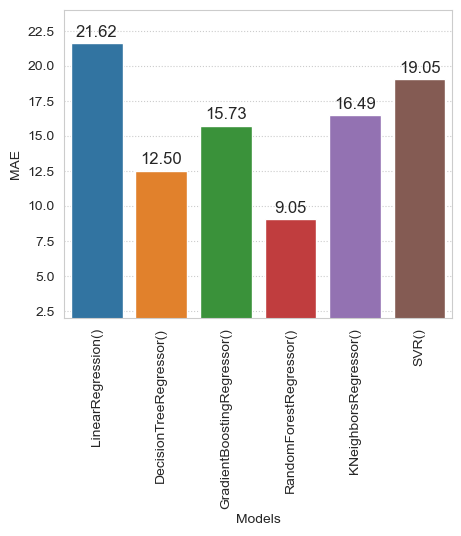

In [479]:
model = pd.Series(model, name='Model').astype(str)
MAE_test = pd.Series(MAE, name='MAE')
output = pd.concat([model, MAE_test], axis=1)

sns.set_style('whitegrid', {'grid.color': '#cccccc', 'grid.linestyle': ':'})
plt.figure(figsize=(5,4))
plots = sns.barplot(data=output, x='Model', y='MAE')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.ylim(2,24)
plt.xticks(rotation=90)
plt.show()

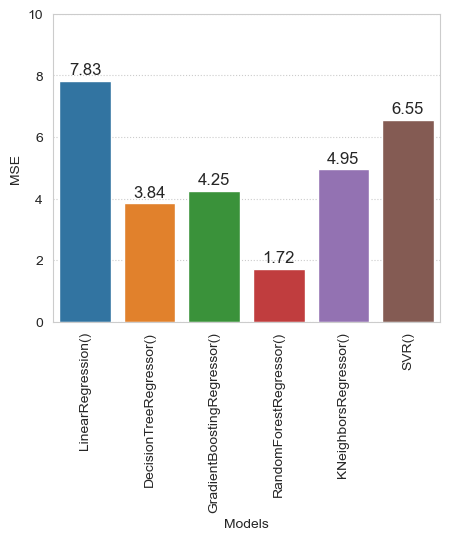

In [480]:
model = pd.Series(model, name='Model').astype(str)
MSE_test = pd.Series(MSE, name='MSE')
output = pd.concat([model, MSE_test], axis=1)

sns.set_style('whitegrid', {'grid.color': '#cccccc', 'grid.linestyle': ':'})
plt.figure(figsize=(5,4))
plots = sns.barplot(data=output, x='Model', y='MSE')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.ylim(0,10)
plt.xticks(rotation=90)
plt.show()

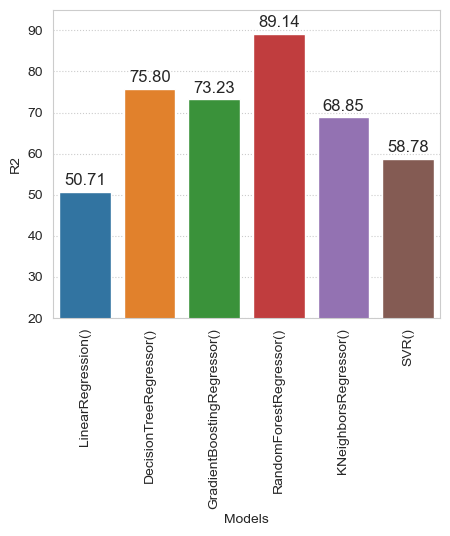

In [481]:
model = pd.Series(model, name='Model').astype(str)
R2_test = pd.Series(R2, name='R2')
output = pd.concat([model, R2_test], axis=1)

sns.set_style('whitegrid', {'grid.color': '#cccccc', 'grid.linestyle': ':'})
plt.figure(figsize=(5,4))
plots = sns.barplot(data=output, x='Model', y='R2')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')
plt.xlabel('Models')
plt.ylabel('R2')
plt.ylim(20,95)
plt.xticks(rotation=90)
plt.show()

In all respects, the best treatment is the RandomForestRegressor

In [482]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [484]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=24))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))  
model.compile(Adam(learning_rate = .001), loss='mean_squared_error')
#result = model.fit(X_train, y_train, batch_size=64, epochs=20)
result = model.fit(X_train, y_train, validation_split = 0.20, batch_size = 100, epochs = 100, shuffle = True, verbose = 2)

Epoch 1/100
117/117 - 1s - loss: 0.8662 - val_loss: 0.1786 - 1s/epoch - 9ms/step
Epoch 2/100
117/117 - 0s - loss: 0.1201 - val_loss: 0.1063 - 252ms/epoch - 2ms/step
Epoch 3/100
117/117 - 0s - loss: 0.0896 - val_loss: 0.0945 - 290ms/epoch - 2ms/step
Epoch 4/100
117/117 - 0s - loss: 0.0829 - val_loss: 0.0893 - 237ms/epoch - 2ms/step
Epoch 5/100
117/117 - 0s - loss: 0.0793 - val_loss: 0.0860 - 228ms/epoch - 2ms/step
Epoch 6/100
117/117 - 0s - loss: 0.0775 - val_loss: 0.0845 - 240ms/epoch - 2ms/step
Epoch 7/100
117/117 - 0s - loss: 0.0760 - val_loss: 0.0830 - 245ms/epoch - 2ms/step
Epoch 8/100
117/117 - 0s - loss: 0.0753 - val_loss: 0.0815 - 241ms/epoch - 2ms/step
Epoch 9/100
117/117 - 0s - loss: 0.0737 - val_loss: 0.0807 - 232ms/epoch - 2ms/step
Epoch 10/100
117/117 - 0s - loss: 0.0729 - val_loss: 0.0798 - 282ms/epoch - 2ms/step
Epoch 11/100
117/117 - 0s - loss: 0.0720 - val_loss: 0.0788 - 275ms/epoch - 2ms/step
Epoch 12/100
117/117 - 0s - loss: 0.0714 - val_loss: 0.0785 - 317ms/epoch - 3

Epoch 98/100
117/117 - 0s - loss: 0.0583 - val_loss: 0.0648 - 231ms/epoch - 2ms/step
Epoch 99/100
117/117 - 0s - loss: 0.0581 - val_loss: 0.0635 - 226ms/epoch - 2ms/step
Epoch 100/100
117/117 - 0s - loss: 0.0581 - val_loss: 0.0640 - 235ms/epoch - 2ms/step


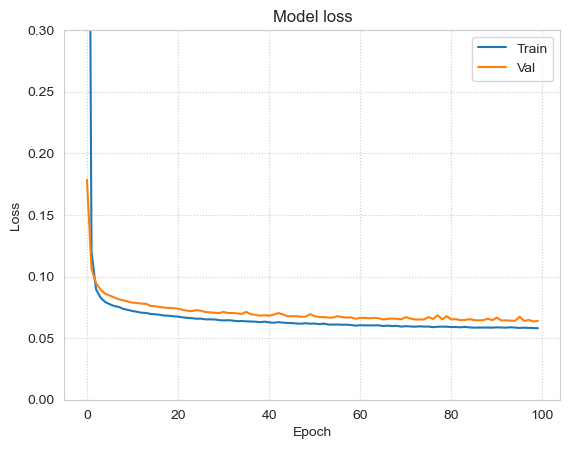

In [485]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,0.3)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

The model demonstrates stable learning without severe over-training or under-training. However, after 20 epochs, further improvements are minimal, and it would be possible to stop learning earlier.

## Conclusions.

**Results:**

*RandomForestRegressor* shows the lowest error values (MAE = 9.05% and MSE = 1.72%) and the highest coefficient of determination (R² = 89.14%), indicating that the model explains most of the variance in the data and outperforms other models in terms of performance.

**Alternatives:**

*DecisionTreeRegressor* also achieved a good R² value (75.80%) and a relatively low MAE (12.50%), but Random Forest outperforms it, likely due to the ensemble approach.

**Conclusion:**

*RandomForestRegressor* is the best choice among the models considered.

>**Результаты:**
>
>*RandomForestRegressor* демонстрирует наименьшие значения ошибок (MAE = 9.05% и MSE = 1.72%) и самый высокий коэффициент детерминации (R² = 89.14%), что говорит о том, что модель объясняет большую часть вариаций в данных и имеет наилучшую производительность по сравнению с другими моделями.
>
>**Альтернативы:**
>
>*DecisionTreeRegressor* также показал хорошее значение R² (75.80%) и достаточно низкий MAE (12.50%), однако Random Forest его превосходит, вероятно, за счет ансамблевого подхода.
>
>**Вывод:**
>
>RandomForestRegressor является лучшим выбором среди рассмотренных моделей.